# Outlier Detection

  We can detect the outlier with the 3 methods which are:
  
  * z score
  * Interquartile Range(IQR)
  * Box Plot 

<b>1 . Outlier Detection using Z score </b>
 
 * Z score for item x gives how many standard deviation it is away from the mean.

 * As per Empirical Formula:
    * 68% of data points will be in the region of 1 standard deviation.
    * 95% of data points will be in the region of 2 std.
    * 99.7% of data points will be in the region of 3 std.
* So, we can say any data points above mean + 3*std or below mean - 3*std as outliers.

   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Count'>

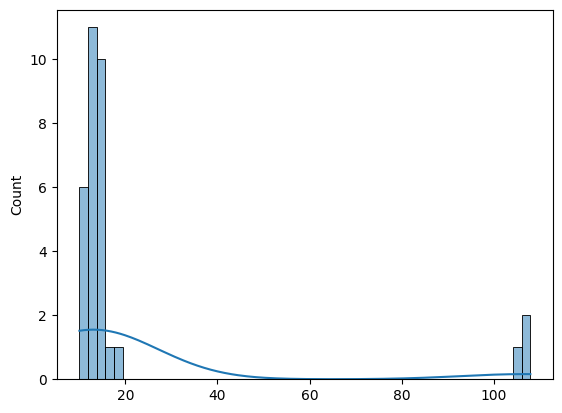

In [40]:
# Create custom Dataset
dataset = [11,10,12,14,12,15,14,13,15, 105 ,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,12,10,14,13,15,10]
sns.histplot(dataset,kde=True)

* Above distribution is not normally distributed.
* It is Right tailed i.e Right Skewed.
* It may be due to some high values i.e near to 100.

Let's try to detect outlier and remove it:

In [41]:
THRESHOLD = 3
def detect_outliers(data):
    outliers = []
    
    mean = np.mean(data)
    std = np.std(data)
    
    # Apply z score for  each and every points in the datasets
    for i in data:
        z_score = (i - mean) / std

        
        # check for outliers
        # append to outlier list in the case of outlier
        if np.abs(z_score) > THRESHOLD:
           outliers.append(i)
    return outliers   
    
outliers = detect_outliers(dataset)
outliers
    

[105, 107, 108]

* Here, data points 102,107,108 falls under the section of outliers

<Axes: ylabel='Count'>

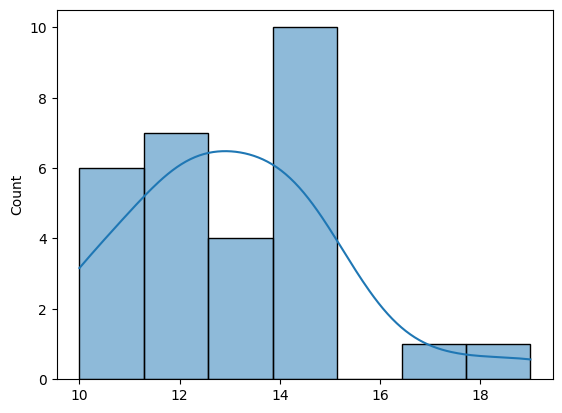

In [42]:
# Remove the outliers
no_outliers = [item for item in dataset if  item not in [105,107,108]]
sns.histplot(no_outliers,kde=True)


<b> 2. Outlier Detection using interquartile Range (IQR):</b>

* IQR is the difference between Q3 and Q1 i.e.
     * IQR = Q3-Q1
where,
Q3 is 75% percentile
Q1 is 50% percentile

* For Detecting Outliers we need to identify Lower Fence and Upper Fence i.e.
     * Lower Fence = Q1 - 1.5 * IQR
     * Upper Fence = Q3 + 1.5 * IQR
     * For Outliers:
         * Data points > Upper Fence or
         * Data points < Lower Fence

* Steps:
   1. Sort the data in ascending Order.
   2. Calculate Q1 and Q3
   3. Calculate IQR
   4. Find Lower Fence and Upper Fence.
   5. Make Conclusion.

In [49]:
# step 1:  Sorting dataset in ascending order 
new_dataset = sorted(dataset)

# step 2 : Find Q1 and Q3
Q1, Q3 = np.percentile(new_dataset,[25,75])

print("Q1 = ", Q1)
print("Q3 = ", Q3)

# step 3 : compute IQR
iqr = Q3 - Q1
print(f"IQR : {iqr}")

# Step 4 : compute Lower and Upper Fence
lower_fence = Q1 - (1.5 * iqr)
upper_fence = Q3 + (1.5 * iqr)

print(f"Lower Fence : {lower_fence}")
print(f"Upper Fence : {upper_fence}")

Q1 =  12.0
Q3 =  15.0
IQR : 3.0
Lower Fence : 7.5
Upper Fence : 19.5


In [50]:
# step 5: Make conclusion

def detect_outliers_using_iqr(data,iqr,lower_fence,upper_fence):
    outliers=[]
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers
outliers = detect_outliers_using_iqr(new_dataset,iqr,lower_fence,upper_fence)
print(f"Detected outliers : \n {outliers}")        

Detected outliers : 
 [105, 107, 108]


- This means the detected outliers using z-score and IQR are same.



<b> 3. Outliers Detection using Box plot

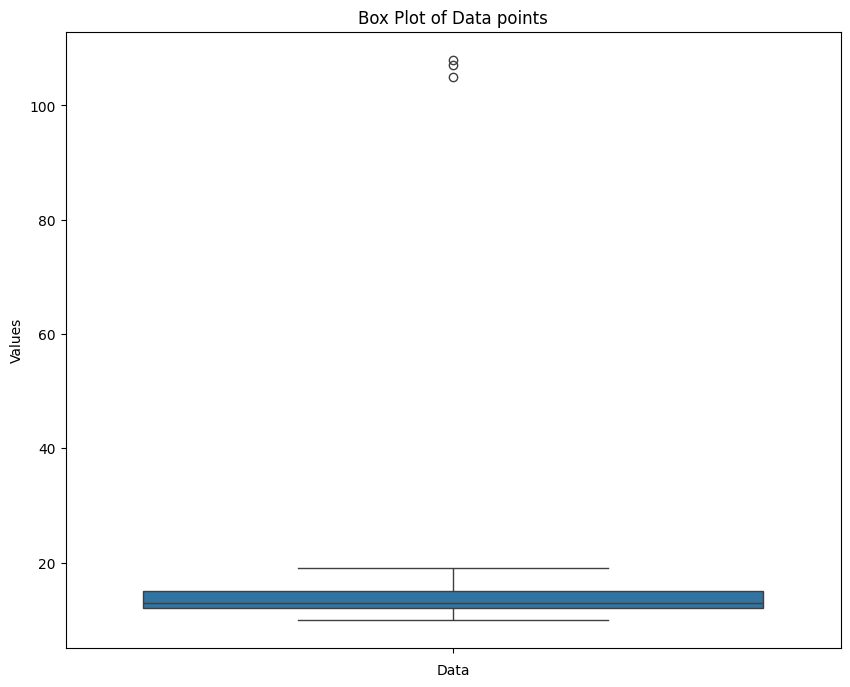

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(data = dataset)
plt.xlabel("Data")
plt.ylabel("Values")
plt.title("Box Plot of Data points")
plt.show(
    
)

From this fig, we get 3 values around 100 as outliers. Sinces it is above maximum values of our Boxplot.